## Analyse de Probleme de désaxement des clients
## Churn Problem Modelin With Classification
### *Application des méthodes ensemblistes sur le probleme de désaxement des clients
 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
churn = pd.read_csv("data_file_churn_problem_modelling.csv")

In [3]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [4]:
#plt.figure(figsize=(20,10))
#sns.heatmap(churn.isna(),cbar=False)

In [5]:
sum_na = churn.isna().sum()

In [6]:
sum_na

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [7]:
df = churn.drop(columns=['RowNumber','CustomerId','Surname'])

## Utilisation de la statistique descriptive pour decrire les données
   -Estimateurs statistiques simples:moyenne,médiane,ecart-type,les quartile Q1-2-3,min-max
   
   -Les graphes:Histogrammes,heatmap,correlation,nuage de points,boxplot(diagrammes à moustache)...

In [8]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [9]:
ag = df[df['Age'] == 32]

In [10]:
ag.shape

(418, 11)

In [11]:
df.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [12]:
df.describe()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


In [13]:
# comparaison quantitative entre la moyenne et la medédiane
abs((df.mean() - df.median())/df.median()) * 100 #ou mean()
#Quand il y beaucoup d'ecart entre les deux,il y a des point aberant 

CreditScore         0.225644
Age                 5.194054
Tenure              0.256000
Balance            21.309632
NumOfProducts      53.020000
HasCrCard          29.450000
IsActiveMember     48.490000
EstimatedSalary     0.103474
Exited                   inf
dtype: float64

In [14]:
#comparaison entre la moyenne et l'ecart-type

In [15]:
0.21 * 100

21.0

In [16]:
#Interpretation il y a des grands ecarts il y  de point aberant au niveau de balance  

In [17]:
df.shape

(10000, 11)

In [18]:
df['Balance'].min()

0.0

<AxesSubplot:>

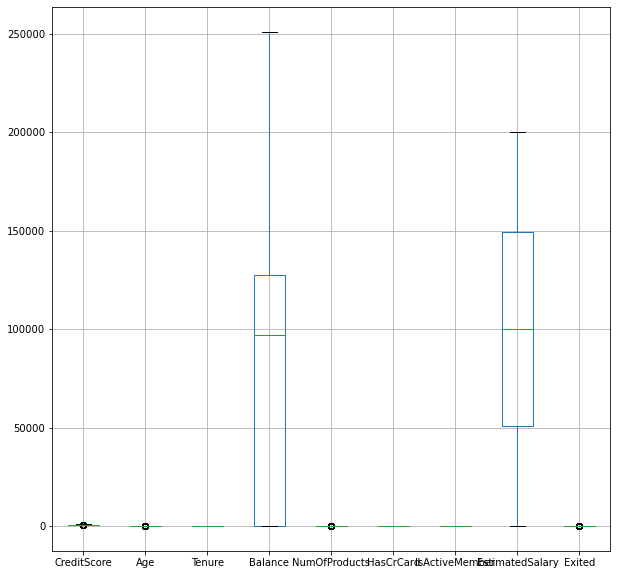

In [19]:
#Boxplot ,diagramme a moustache
df.boxplot(figsize=(10,10))

In [20]:
df["Age"].min()

18

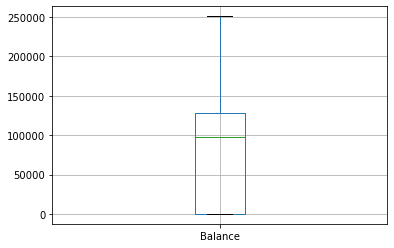

In [21]:
df[["Balance"]].boxplot();

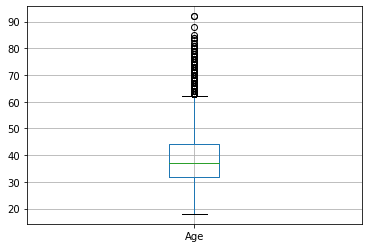

In [22]:
df[["Age"]].boxplot();

-La theorie des valeurs extremes:Tukey methode [limite]

- (Ecart interquartile * 1,5)

-(Q3 - Q1) * 1,5 + Q3 (si le client sort de cette valeur ,on peut que il y a de valeur aberant)

-Q1 - (Q3-Q1) * 1,5 (pour le point bar min)[limite inferieur]

<AxesSubplot:>

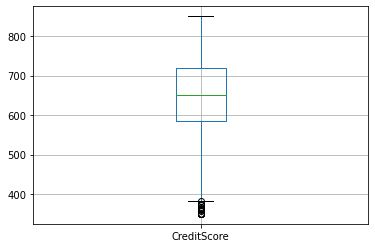

In [23]:
df[["CreditScore"]].boxplot()

In [24]:
df["CreditScore"].min()

350

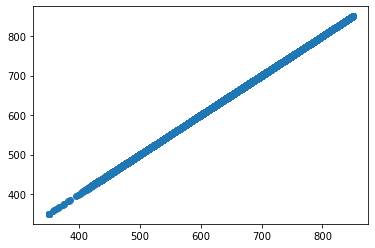

In [25]:
plt.scatter(df["CreditScore"],df["CreditScore"])

In [26]:
#ici la valeur minimale est largement inferieur a 400 selon la calcule

-L etude des boxplots et la comparaison entre les valeurs moyennes et les médianes montre l existence de plusisures points aberrants(outliers,anomalies)

-On se propose dans le reste de l analyse de garder ces clients

In [27]:
df["Exited"].value_counts()#0= rest , 1=quitté

0    7963
1    2037
Name: Exited, dtype: int64

/home/bob/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Exited', ylabel='count'>

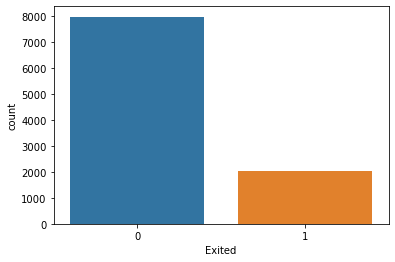

In [28]:
sns.countplot(df["Exited"])

In [29]:
# what is the percentage of customers that are leaving ?
# Est ce qu'on peut calculer le pourcentage des clients qui sont quitté la banque

#Réponse:On va utiliséle module Pandas
#semblable à where en sql
#masking

#pourcentage par rapport au line
num_retained = df[df["Exited"] == 0].shape[0] /  df.shape[0]
num_churned = df[df["Exited"] == 1].shape[0] /  df.shape[0]
print(num_retained / (num_churned + num_retained)*100,"%")
print(num_churned / (num_churned + num_retained)*100,"%")

79.63 %
20.369999999999997 %


In [30]:
df[df["Exited"] == 1].sum() #7963

CreditScore                                                  1314581
Geography          FranceFranceSpainGermanyGermanySpainSpainFranc...
Gender             FemaleFemaleMaleFemaleMaleFemaleFemaleFemaleFe...
Age                                                            91335
Tenure                                                         10048
Balance                                                  1.85588e+08
NumOfProducts                                                   3005
HasCrCard                                                       1424
IsActiveMember                                                   735
EstimatedSalary                                          2.06686e+08
Exited                                                          2037
dtype: object

In [31]:
v = df[df["Exited"] == 0]
v["Exited"].shape[0]

7963

In [32]:
# Interpretation:70% des clients sont restés , 20% des clients sont quittés

<AxesSubplot:xlabel='Exited', ylabel='count'>

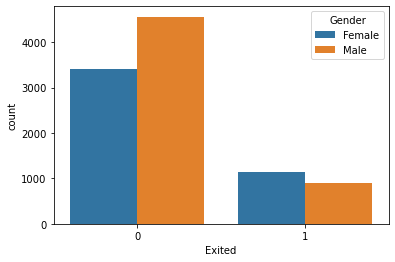

In [33]:
#Quantifions l effet du sexe sur la variable cible
sns.countplot(x = "Exited",hue="Gender",data=df)

In [76]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:xlabel='Gender', ylabel='count'>

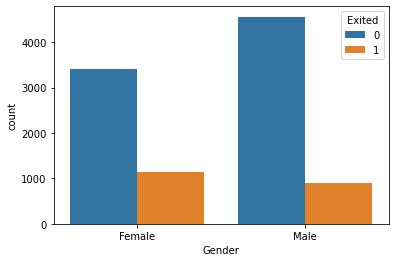

In [34]:
sns.countplot(x = "Gender",hue="Exited",data=df)#type:Gender = Object[Qualitative] , Exited = Qualitative[discret]

In [35]:
#Qualitativement le nombre des hommes(Male) qui sont resté est plus grand que la femme
#le nombre de femme qui sont quité est plus grand que celle des hommes ,pourquoi?
#qu'est ce qi se passe
#variable interressante

In [73]:
df.dtypes()

TypeError: 'Series' object is not callable

In [36]:
pd.crosstab(df["Gender"],df["Exited"],margins = True)#table de contengence

Exited,0,1,All
Gender,,,
Female,3404,1139,4543
Male,4559,898,5457
All,7963,2037,10000


In [37]:
df["Geography"].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

<AxesSubplot:xlabel='Geography', ylabel='count'>

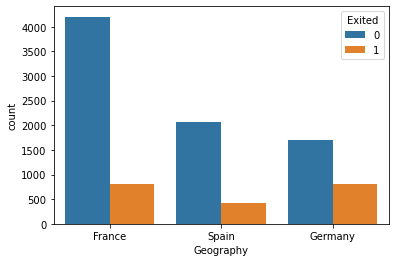

In [38]:
sns.countplot(x = "Geography",hue = "Exited",data = df)

In [39]:
pd.crosstab(df["Geography"],df["Exited"],margins = True)#table de contengence
#Allemagne(Spain)

Exited,0,1,All
Geography,,,
France,4204,810,5014
Germany,1695,814,2509
Spain,2064,413,2477
All,7963,2037,10000


- On remarque les allmends quittent la banque plus que les autres nationalité

<AxesSubplot:xlabel='Age', ylabel='count'>

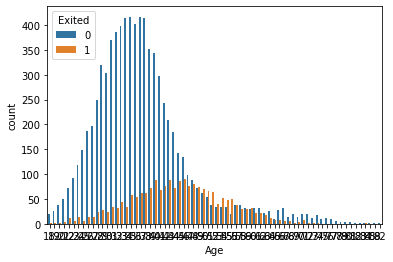

In [40]:
# Etude de l effet de la variable Age #qt
%matplotlib inline 
sns.countplot(x = "Age",hue = "Exited" ,data = df)

/home/bob/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


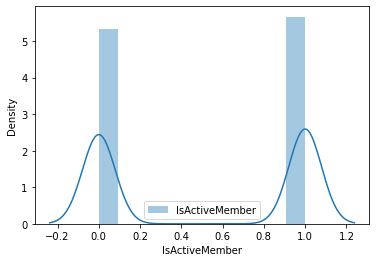

In [84]:
    plt.figure()
    #sns.distplot(df["Age"], label='Age') 
    sns.distplot(df["IsActiveMember"], label='IsActiveMember')
    #tous ce qui sont positives de la colones songuins
    #sns.distplot(df["Exited"], label='Exited')
    #tous ce qui sont negatives de la colones songuins
    plt.legend()

In [81]:
#Image = interpretation
#Histograme continu
#Plus on est agé plus on quitte , pourqoui?
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [42]:
df.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

<AxesSubplot:>

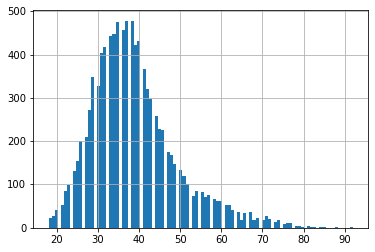

In [43]:
%matplotlib inline 
#histograme de PANDAS => plt
df["Age"].hist(bins = 100) #bins = interval

In [44]:
#cette histograme suit la loi de probabilité Chi2 , donc on peut la transformé en dansité de probabilité Chi2[standardisé et normalisé selon la loi]

-On remarque que l'histogramme de la variable Age suit une loi de Chi 2

#### interpretation:
-On remarque que l histogramme de la variable Age des clients qui quittent est décalé vers les grandes valeur

In [45]:
# Etude de la variable MasCrCard
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

<AxesSubplot:xlabel='HasCrCard', ylabel='count'>

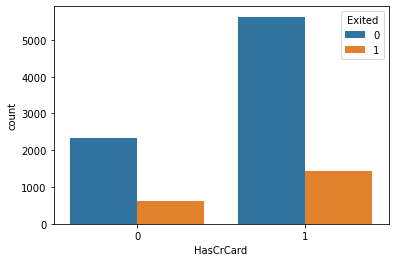

In [46]:
sns.countplot(x = "HasCrCard" , hue="Exited",data = df)

In [47]:
pd.crosstab(df["HasCrCard"],df["Exited"],margins = True)

Exited,0,1,All
HasCrCard,,,
0,2332,613,2945
1,5631,1424,7055
All,7963,2037,10000


In [48]:
#Etude de la variable IsActiveMember

<AxesSubplot:xlabel='IsActiveMember', ylabel='count'>

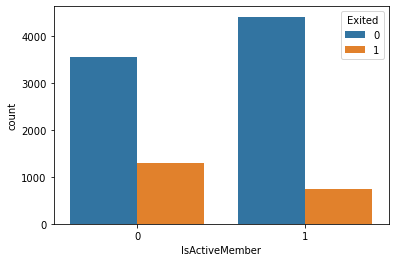

In [49]:
sns.countplot(x = "IsActiveMember",hue = "Exited" ,data = df )

In [50]:
pd.crosstab(df["IsActiveMember"],df["Exited"],margins = True)

Exited,0,1,All
IsActiveMember,,,
0,3547,1302,4849
1,4416,735,5151
All,7963,2037,10000


- les inactifs qui sont partient sont plus petit que les inactifs qui sont restés
- les actifs qui sont partient sont plus petit que les actifs qui sont restés   
- le nombre de ceux qui sont restés est plus grands que ceux lui qui quitte(7963 > 2037)
- le nombre de ceux qui sont inactifs est plus petit que ceux qui sont actifs(4849 < 5151)

# unifier l etude avec un code qui permet de representer les "countplot"pour toutes les variables numérique

In [51]:
df.select_dtypes(exclude = object).columns #a l'exeptio de l object

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [52]:
numerical_features = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']

In [53]:
len(numerical_features)

8

array([<AxesSubplot:title={'center':'CreditScore'}>,
       <AxesSubplot:title={'center':'Age'}>,
       <AxesSubplot:title={'center':'Tenure'}>,
       <AxesSubplot:title={'center':'Balance'}>,
       <AxesSubplot:title={'center':'NumOfProducts'}>,
       <AxesSubplot:title={'center':'HasCrCard'}>,
       <AxesSubplot:title={'center':'IsActiveMember'}>,
       <AxesSubplot:title={'center':'EstimatedSalary'}>], dtype=object)

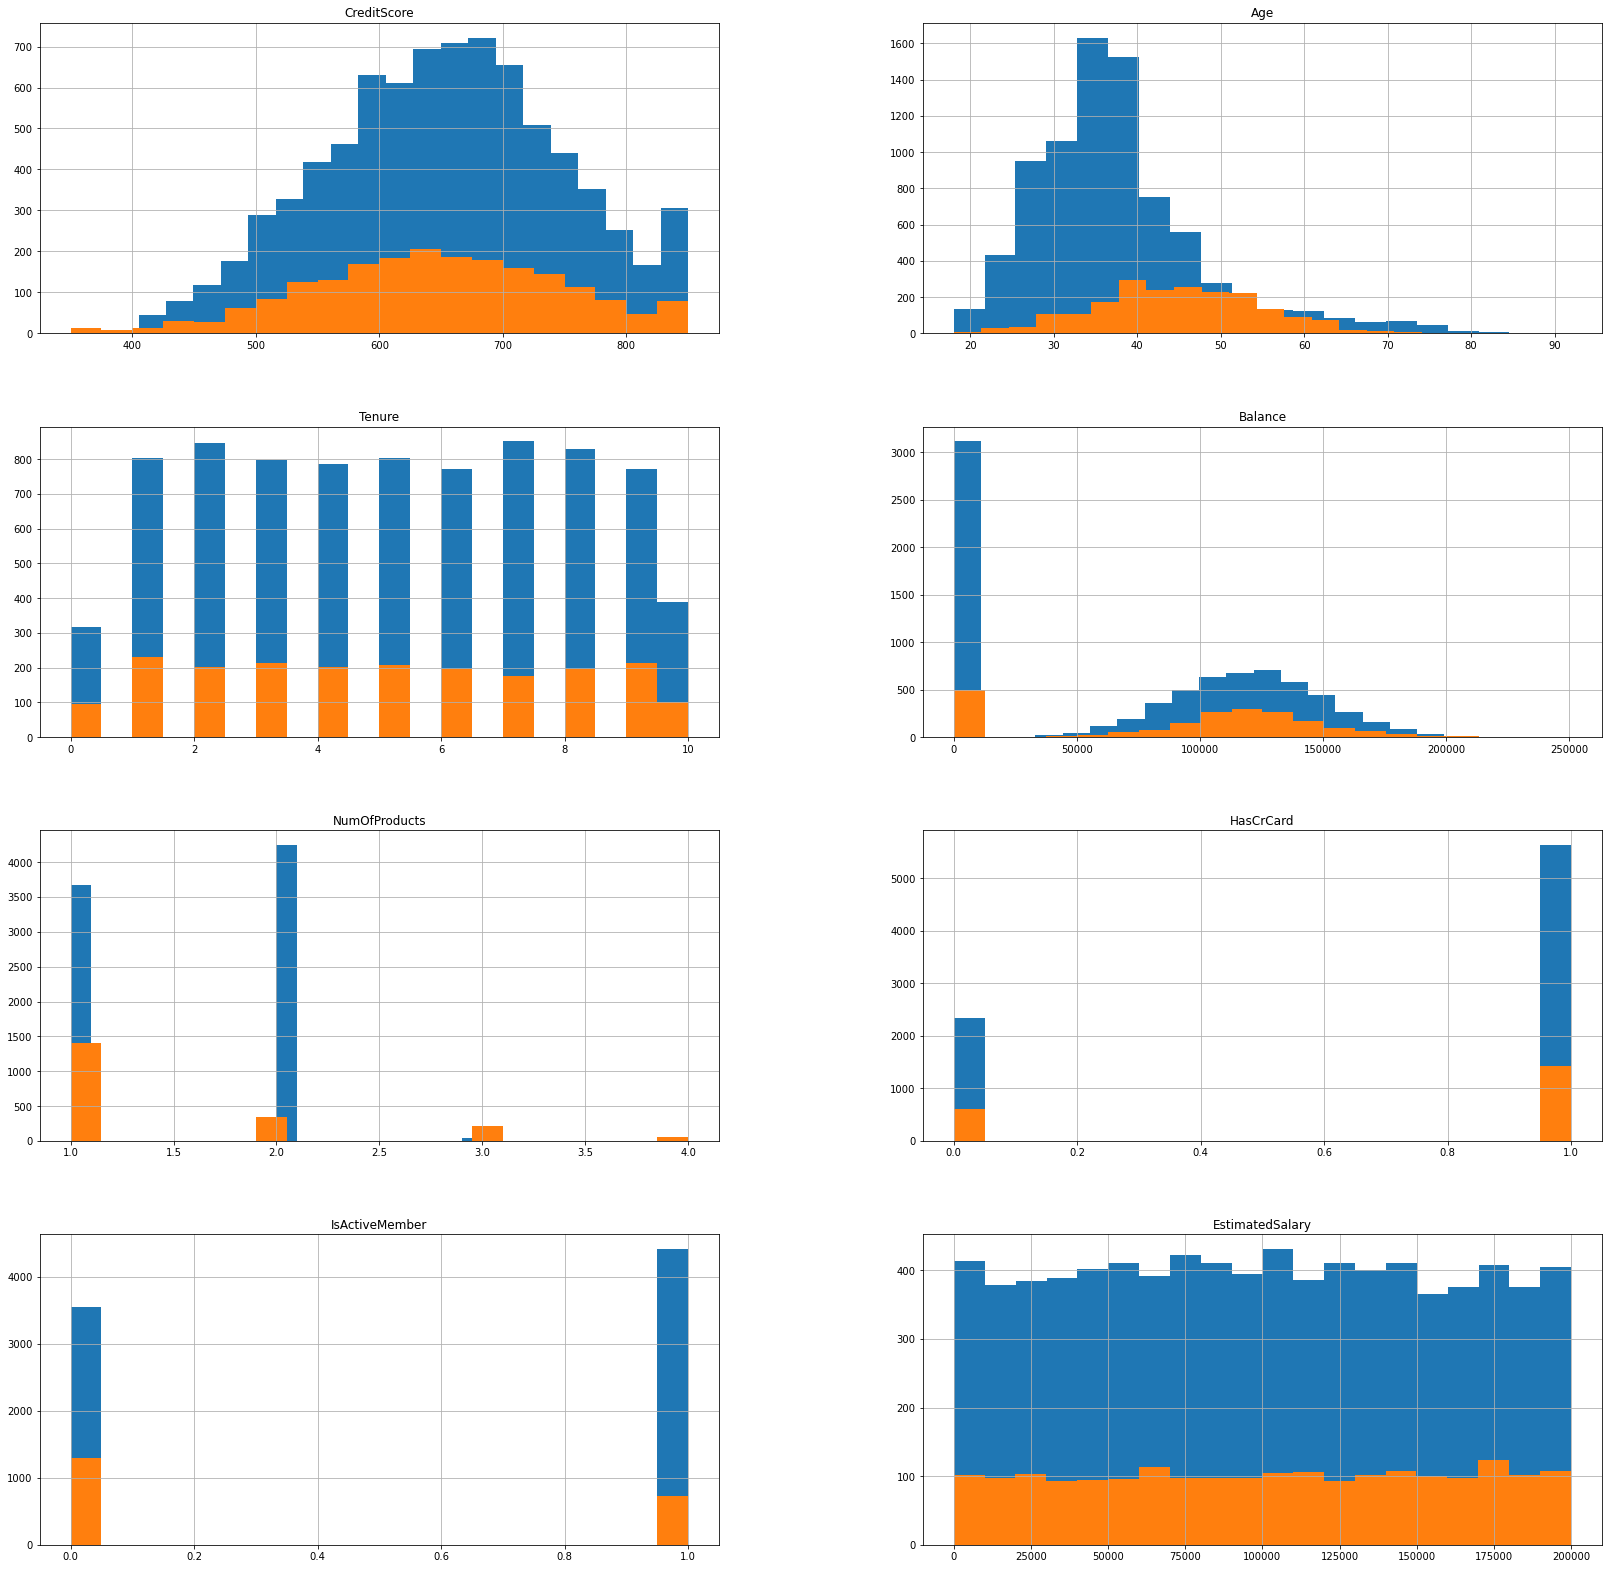

In [54]:
%matplotlib inline
fig , ax = plt.subplots(4,2,figsize = (28,28))
df[df.Exited == 0][numerical_features].hist(bins =20 , ax = ax )
df[df.Exited == 1][numerical_features].hist(bins =20 , ax = ax )

<AxesSubplot:>

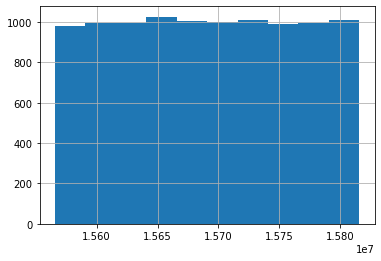

In [55]:
#La distribution de la clé primaire[CustomerId] suit une loi uniforme continue
#Sous l hypothese d'equiprobabilité , on ne peut pas extraire beauxoup
#d'information
churn["CustomerId"].hist()

<AxesSubplot:>

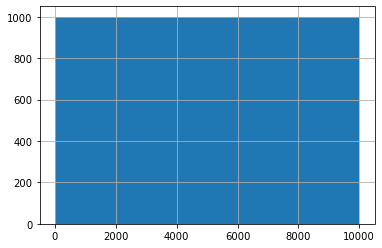

In [56]:
#Pareil pou le suivant
churn["RowNumber"].hist()

In [57]:
df["Gender"].unique()

array(['Female', 'Male'], dtype=object)

In [58]:
# One Hot Encoder
quali_encoder = pd.get_dummies(df[["Geography","Gender"]],drop_first = True)

In [59]:
quali_encoder

,Geography_Germany,Geography_Spain,Gender_Male
0,0,0,0
1,0,1,0
2,0,0,0
3,0,0,0
4,0,1,0
...,...,...,...
9995,0,0,1
9996,0,0,1
9997,0,0,0
9998,1,0,1


In [60]:
#df = df.drop(columns=["Geography","Gender"])

In [61]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [62]:
pd.concat([quali_encoder,df],axis = 1)

,Geography_Germany,Geography_Spain,Gender_Male,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,0,0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,0,1,0,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,0,0,0,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,0,0,0,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,0,1,0,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,0,0,1,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,0,0,1,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,0,0,0,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,1,0,1,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


In [63]:
df_encode = pd.concat([quali_encoder,df],axis = 1)

In [64]:
X = df_encode.iloc[:,0:-1] #toute les ligne et les colones de 0 a avant dernier
y = df_encode.iloc[:,-1]

In [65]:
#pd.plotting.scatter_matrix(X)

In [66]:
# Rescaling
# Remise a l'echelle
from sklearn.preprocessing import StandardScaler

In [67]:
#ss = StandardScaler()
#Xss = ss.fit_transform(X)

In [68]:
Xss.shape

NameError: name 'Xss' is not defined

In [ ]:
# Echantillionage aleatoire
# Random Sampling
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.2,random_state = 1) 


In [ ]:
X_train

In [ ]:
X_train.shape

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

In [ ]:
#modelisation avec l'algorithme random forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [ ]:
model_rf = RandomForestClassifier(criterion="entropy",n_estimators = 1100,  n_jobs=1 ,random_state = 1)
model_rf

In [ ]:
model_rf.fit(X_train,y_train)

In [ ]:
y_pred = model_rf.predict(X_test)

In [ ]:
y_pred == y_test

In [ ]:
from sklearn.metrics import confusion_matrix,classification_report

In [ ]:
confusion_matrix(y_test,y_pred)

In [ ]:
#taux d'erreur
n = 1536 + 49 + 221 + 194 
(221 + 49)/n 

In [ ]:
#recall = rappel = taux VP = Sensibilité = a/(a+b)
1536/(1536+49)

In [ ]:
model_rf.score(X_test,y_test)

In [ ]:
model_rf.score(X_train,y_train)

In [ ]:
print(classification_report(y_test,y_pred))

In [ ]:
model_svc = SVC()

In [ ]:
model_svc.fit(X_train,y_train)
y_predd = model_svc.predict(X_test)

In [ ]:
model_svc.score(X_test,y_test)

In [ ]:
print(classification_report(y_test,y_predd))

# Apprentissage collectif:implementation Python

In [ ]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

In [ ]:
lr = LogisticRegression()
dt = DecisionTreeClassifier(criterion="entropy")
svm = SVC()

In [ ]:
#Attetion il faut changer l echelle des données avec l application
#des algorithmes logistic regression et support vector machine sinon
#le temps de calcul d'exploser
evc = VotingClassifier(estimators = [('lr',lr),('dt',dt),('svm',svm)],voting='hard',n_jobs=-1)
train = evc.fit(X_train,y_train)

In [ ]:
print(train.predict(X_test).shape)

In [ ]:
y_pred = train.predict(X_test)
train.score(X_test,y_test)

In [ ]:
1517 + 68

In [ ]:
#1585 -> 100
#  ?     96
(96.0*1585) / 100

In [ ]:
224 + 191

In [ ]:
0.96 * 100

In [ ]:
(96.0*415) / 100

In [ ]:
#pd.pickle pour prod 

In [ ]:
#Precision = TP/TP+FP
#Recall = TP/TP+FN

- [[1517...68]
- [224...191]]

In [ ]:
TP = 1517+68
FP = 68
Precision_0 = TP/(TP + FP)
Precision_0

In [ ]:
1517+68+68